In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np

In [2]:
batch_size = 64
test_batch_size = 1000
epochs = 14
lr = 1
gamma = 0.7
criterion = nn.CrossEntropyLoss()

In [3]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print('Train Epoch: {}, Loss: {:.3f}'.format(epoch, loss.item()))


def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = len(test_loader.dataset)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('Average loss: {:.3f}, Test Acc: {:.3f} ({}/{})'.format(test_loss, 100.*correct/total, correct, total))


In [4]:
trainset = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))
testset = datasets.FashionMNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))
train_loader = torch.utils.data.DataLoader(trainset,batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset,batch_size=test_batch_size, shuffle=True)

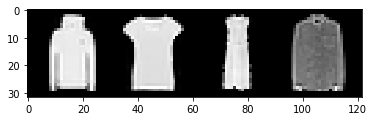

Pullover Shirt Dress Shirt


In [5]:
classes = ('T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
            'Sneaker','Bag','Ankle Boot')

def imshow(image):
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image,(1,2,0)))
    plt.show()

images,labels = next(iter(train_loader))
imshow(utils.make_grid(images[0:4]))
print(' '.join(classes[labels[j]] for j in range(4)))

In [6]:
class dense_Net(nn.Module):
    def __init__(self):
        super(dense_Net, self).__init__()
        self.dense_layers = nn.Sequential(
                     nn.Flatten(),
                     nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,10)
        )

    def forward(self, x):
        out = self.dense_layers(x)
        return out

model = dense_Net()
optimizer = optim.Adadelta(model.parameters(), lr=lr)

scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)
    scheduler.step()

Train Epoch: 1, Loss: 0.562
Average loss: 0.000, Test Acc: 84.170 (8417/10000)
Train Epoch: 2, Loss: 0.381
Average loss: 0.000, Test Acc: 84.320 (8432/10000)
Train Epoch: 3, Loss: 0.201
Average loss: 0.000, Test Acc: 86.020 (8602/10000)
Train Epoch: 4, Loss: 0.235
Average loss: 0.000, Test Acc: 86.490 (8649/10000)
Train Epoch: 5, Loss: 0.185
Average loss: 0.000, Test Acc: 87.400 (8740/10000)
Train Epoch: 6, Loss: 0.239
Average loss: 0.000, Test Acc: 88.000 (8800/10000)
Train Epoch: 7, Loss: 0.360
Average loss: 0.000, Test Acc: 88.130 (8813/10000)
Train Epoch: 8, Loss: 0.252
Average loss: 0.000, Test Acc: 88.200 (8820/10000)
Train Epoch: 9, Loss: 0.164
Average loss: 0.000, Test Acc: 88.210 (8821/10000)
Train Epoch: 10, Loss: 0.246
Average loss: 0.000, Test Acc: 88.420 (8842/10000)
Train Epoch: 11, Loss: 0.228
Average loss: 0.000, Test Acc: 88.350 (8835/10000)
Train Epoch: 12, Loss: 0.173
Average loss: 0.000, Test Acc: 88.410 (8841/10000)
Train Epoch: 13, Loss: 0.154
Average loss: 0.000,

In [8]:
class cnn_Net(nn.Module):
    def __init__(self):
        super(cnn_Net, self).__init__()
        self.conv_1 = nn.Conv2d(1, 4, 4, padding=1,stride=2)
        self.conv_2 = nn.Conv2d(4, 16, 4, padding=1,stride=2)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(49*16,128)
        self.output = nn.Linear(128,10)

    def forward(self, x):
        x = F.relu(self.conv_1(x))
        x = F.relu(self.conv_2(x))
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        out = self.output(x)
        return out
model = cnn_Net()
optimizer = optim.Adadelta(model.parameters(), lr=lr)

scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)
    scheduler.step()

Train Epoch: 1, Loss: 0.275
Average loss: 0.000, Test Acc: 84.930 (8493/10000)
Train Epoch: 2, Loss: 0.362
Average loss: 0.000, Test Acc: 87.130 (8713/10000)
Train Epoch: 3, Loss: 0.117
Average loss: 0.000, Test Acc: 88.330 (8833/10000)
Train Epoch: 4, Loss: 0.359
Average loss: 0.000, Test Acc: 89.100 (8910/10000)
Train Epoch: 5, Loss: 0.296
Average loss: 0.000, Test Acc: 89.280 (8928/10000)
Train Epoch: 6, Loss: 0.165
Average loss: 0.000, Test Acc: 89.580 (8958/10000)
Train Epoch: 7, Loss: 0.162
Average loss: 0.000, Test Acc: 89.680 (8968/10000)
Train Epoch: 8, Loss: 0.057
Average loss: 0.000, Test Acc: 89.730 (8973/10000)
Train Epoch: 9, Loss: 0.190
Average loss: 0.000, Test Acc: 90.120 (9012/10000)
Train Epoch: 10, Loss: 0.279
Average loss: 0.000, Test Acc: 89.990 (8999/10000)
Train Epoch: 11, Loss: 0.465
Average loss: 0.000, Test Acc: 89.970 (8997/10000)
Train Epoch: 12, Loss: 0.135
Average loss: 0.000, Test Acc: 90.080 (9008/10000)
Train Epoch: 13, Loss: 0.110
Average loss: 0.000,